In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [2]:
df =pd.read_csv(r"C:\Users\91998\Downloads\Multiple CSV\Multiple CSV\3.concertriccir2.csv",header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [4]:
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [5]:
df[2].unique()

array([0., 1.])

### Observation: By viewing the above graph we can easily say that x and y s have non linear relationship.m

In [8]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [9]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

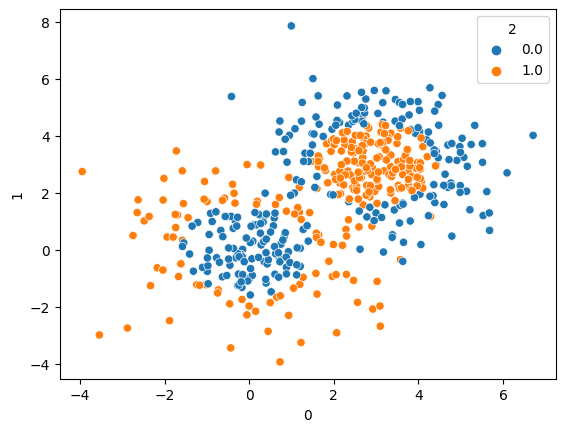

In [11]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

### Observation: By viewing the above graph we can easily say that x and y s have non linear relationship.

In [12]:
## Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [13]:
## Preprocessing train and test data
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [23]:
model=Sequential()
model.add(Dense(18,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(16,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(8,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 18)                54        
                                                                 
 dense_11 (Dense)            (None, 16)                304       
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
 dense_13 (Dense)            (None, 8)                 88        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 625 (2.44 KB)
Trainable params: 625 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
81/81 [==============================] - 1s 4ms/step - loss: 0.7296 - accuracy: 0.5926 - val_loss: 0.7168 - val_accuracy: 0.6222
Epoch 2/20
81/81 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.6296 - val_loss: 0.7129 - val_accuracy: 0.5333
Epoch 3/20
81/81 [==============================] - 0s 2ms/step - loss: 0.6530 - accuracy: 0.6716 - val_loss: 0.6167 - val_accuracy: 0.7778
Epoch 4/20
81/81 [==============================] - 0s 2ms/step - loss: 0.6107 - accuracy: 0.7160 - val_loss: 0.5680 - val_accuracy: 0.7778
Epoch 5/20
81/81 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7630 - val_loss: 0.7580 - val_accuracy: 0.6222
Epoch 6/20
81/81 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7605 - val_loss: 0.5923 - val_accuracy: 0.6222
Epoch 7/20
81/81 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7852 - val_loss: 0.5365 - val_accuracy: 0.7556
Epoch 8/20
81/81 [==

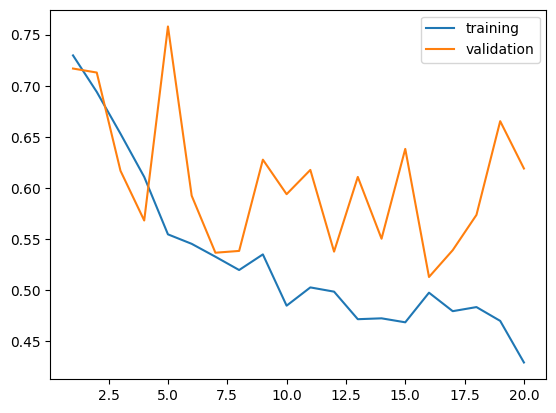

In [26]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 9s 928us/step


<Axes: >

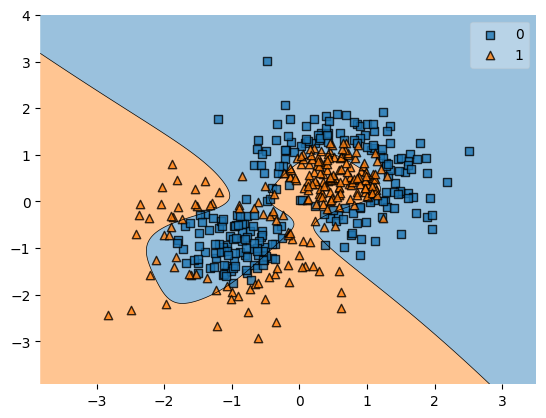

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

## Using Relu

In [66]:
model=Sequential()
model.add(Dense(28,activation="relu",input_dim=2))
model.add(Dense(26,activation="relu"))
model.add(Dense(24,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [67]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 28)                84        
                                                                 
 dense_40 (Dense)            (None, 26)                754       
                                                                 
 dense_41 (Dense)            (None, 24)                648       
                                                                 
 dense_42 (Dense)            (None, 1)                 25        
                                                                 
Total params: 1511 (5.90 KB)
Trainable params: 1511 (5.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
81/81 [==============================] - 1s 3ms/step - loss: 0.6831 - accuracy: 0.6000 - val_loss: 0.6768 - val_accuracy: 0.5556
Epoch 2/20
81/81 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6716 - val_loss: 0.6124 - val_accuracy: 0.7556
Epoch 3/20
81/81 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.7185 - val_loss: 0.5308 - val_accuracy: 0.7556
Epoch 4/20
81/81 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7506 - val_loss: 0.4298 - val_accuracy: 0.9111
Epoch 5/20
81/81 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7802 - val_loss: 0.3909 - val_accuracy: 0.8667
Epoch 6/20
81/81 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8148 - val_loss: 0.3970 - val_accuracy: 0.8222
Epoch 7/20
81/81 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8123 - val_loss: 0.4032 - val_accuracy: 0.7778
Epoch 8/20
81/81 [==

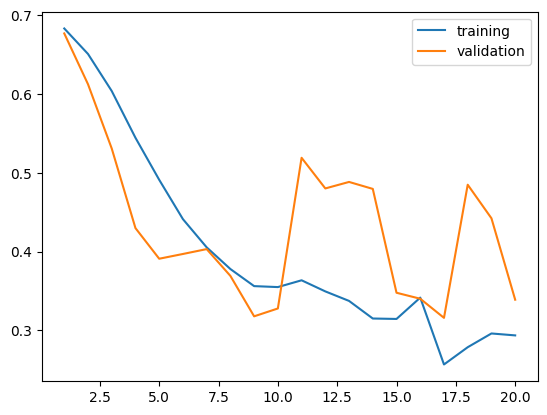

In [69]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 9s 902us/step


<Axes: >

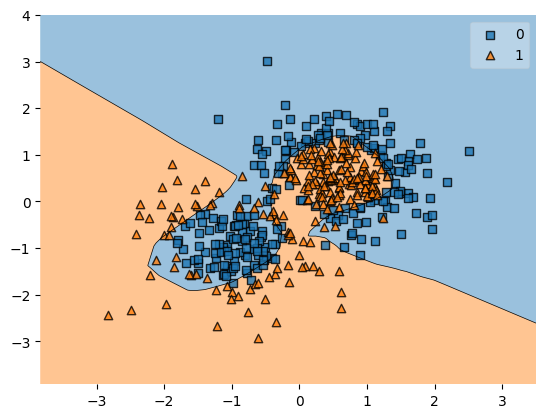

In [70]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 9s 886us/step


<Axes: >

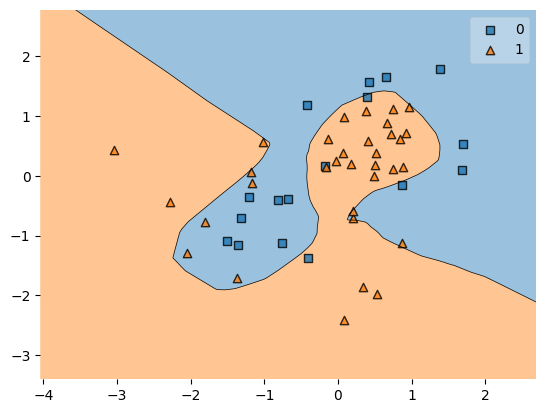

In [71]:
plot_decision_regions(x_testp,y_test.values,clf=model)